# Offline Twitter Analysis

This notebook is used to:
* read historydata.
* make basic transformations.
* make an explorational data analysis.

## The data
The data contents summaries of metrics for unique combinations of the hashtags(case-unsensitive):
* #Trump
* #News
* #FakeNews
* #Democrats
* #Politics
The combination is generated with boolean flags for every hashtag.
If a tweet does not contain any of these hashtags, it links to a valid combination aswell. This combination is therefore '[false,false,false,false,false]'.

Summaries about the last 60 seconds are recorded every second for every unique hashtag combination. If a combination did not occure in this timewindow, no summary is recorded for this combination.

### Used metrics
Following metrics were calculated for every occuring hashtag combination in a timewindow of the last 60 seconds:
* count - The total count of tweets for this combination
* meanTextLength - the mean length of a not truncated tweet (hashtags and mentions included)
* meanHashtagCount - The mean count of hashtags
* meanTrumpCount - The mean occurences of the word 'trump' in the tweet texts; not case-sensitive.
* meanSensitiveCount - The mean count of tweets flagged as "Possibly sensitive". (Flagging performed by Twitter)

These metrics are used to generate a prediction for hashtag combinations w.r.t. the time of the day.

## Used libaries
Make sure those are installed.

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta

### Plotting
And display in notebook.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 9.0)
%matplotlib inline

## Reading history CSV files

In [3]:
# The main working directory
mainDir = ""

comboHistoryFile = mainDir + "comboHistory.csv"
#allTweetsFile = mainDir + "tweetHistory.csv"

In [4]:
comboHistory = pd.read_csv(comboHistoryFile,
                           sep=";", 
                           header = 0)
# commented out 
#allTweets = pd.read_csv(allTweetsFile,
#                        sep=";", 
#                        header = 0)

if 'allTweets' in locals():
    print("Number of processed tweets: " + str(len(allTweets)))
print("Number of summaries for hashtag-combinations: " + str(len(comboHistory)))

Number of summaries for hashtag-combinations: 728330


##### The data has following columns

In [5]:
comboHistory.columns

Index(['timestamp', 'time', 'isTrumpTweet', 'isNewsTweet', 'isFakeNewsTweet',
       'isDemocratsTweet', 'isPoliticsTweet', 'count', 'meanTextLength',
       'meanHashtagCount', 'meanTrumpCount', 'meanSensitiveCount'],
      dtype='object')

In [6]:
comboHistory['timestamp'] = pd.to_datetime(comboHistory['timestamp']) + timedelta(hours=1)
comboHistory['time'] = pd.to_datetime(comboHistory['time']).apply(lambda x: x.time())

In [7]:
# group by hashtag combination, calculate mean values of metrics
meanMetrics = comboHistory.groupby(['isTrumpTweet','isNewsTweet','isFakeNewsTweet','isDemocratsTweet','isPoliticsTweet'])['count', 
                                                                                                                          'meanTextLength', 
                                                                                                                          'meanHashtagCount', 
                                                                                                                          'meanTrumpCount', 
                                                                                                                          'meanSensitiveCount'].agg(np.mean).reset_index()
print("Found " + str(len(meanMetrics)) + " unique hashtag combinations")

Found 22 unique hashtag combinations


## Plots

#### Data splitting
We want various combinations of data for analysis.

In [8]:
comboList = list()
for i in range(0, len(meanMetrics)):
    comboList.append(meanMetrics.loc[i,['isTrumpTweet',
                                        'isNewsTweet',
                                        'isFakeNewsTweet',
                                        'isDemocratsTweet',
                                        'isPoliticsTweet']].to_frame().transpose())

In [9]:
comboTimeseriesList = list()
for i in range(0,len(comboList)):
    comboTimeseriesList.append(comboList[i]
                               .merge(comboHistory,on=['isTrumpTweet',
                                                       'isNewsTweet',
                                                       'isFakeNewsTweet',
                                                       'isDemocratsTweet',
                                                       'isPoliticsTweet']))

#### Plotfunction definition:

In [10]:
def plotMetric(df,metricName):
    traces = list()
    
    fig = plt.figure(figsize=(16,9))
    ax = plt.axes()

    for i in range(0,len(df)):
        df.plot(y=metricName, kind = 'bar', label=i, ax=ax)
    ax.legend().set_visible(False)

    plt.ylabel(metricName)
    
    plt.title('Mean of Metric: ' + metricName, fontsize=18)

In [11]:
def plotMetricTimeseries(dfList, metricName, timeName = 'timestamp', skip=0, kind = 'line'):
    traces = list()
    
    fig = plt.figure(figsize=(16,9))
    ax = plt.axes()

    for i in range(skip,len(dfList)):
        df = dfList[i]
        df.plot(x=timeName, y=metricName, label=i, ax=ax, linewidth = 0.5, kind = kind)
        
    titleStr= 'Timeseries of Metric: ' + metricName
    
    
    plt.xlabel(timeName)
    plt.ylabel(metricName)
    plt.suptitle('Timeseries of Metric: ' + metricName, fontsize=18)
    
    if(skip>0):
       plt.title('(skipped ' + str(skip) + ' datarows)', fontsize=10)
    
    plt.legend()

Due to the quantity of unique combinations, refer to this table for index-combo linking.

In [12]:
meanMetrics.loc[:,['isTrumpTweet','isNewsTweet','isFakeNewsTweet','isDemocratsTweet','isPoliticsTweet']]

,isTrumpTweet,isNewsTweet,isFakeNewsTweet,isDemocratsTweet,isPoliticsTweet
0,False,False,False,False,False
1,False,False,False,False,True
2,False,False,False,True,False
3,False,False,False,True,True
4,False,False,True,False,False
5,False,False,True,False,True
6,False,False,True,True,False
7,False,True,False,False,False
8,False,True,False,False,True
9,False,True,False,True,False


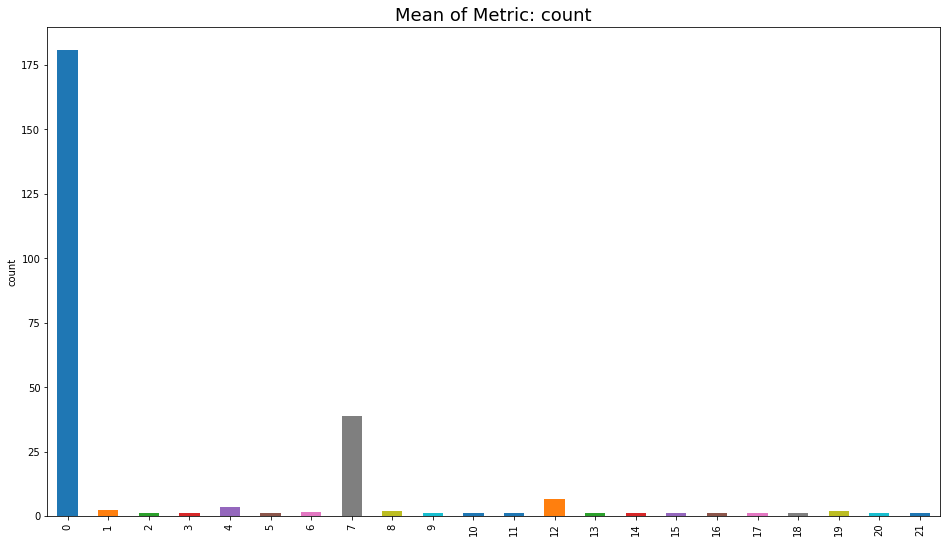

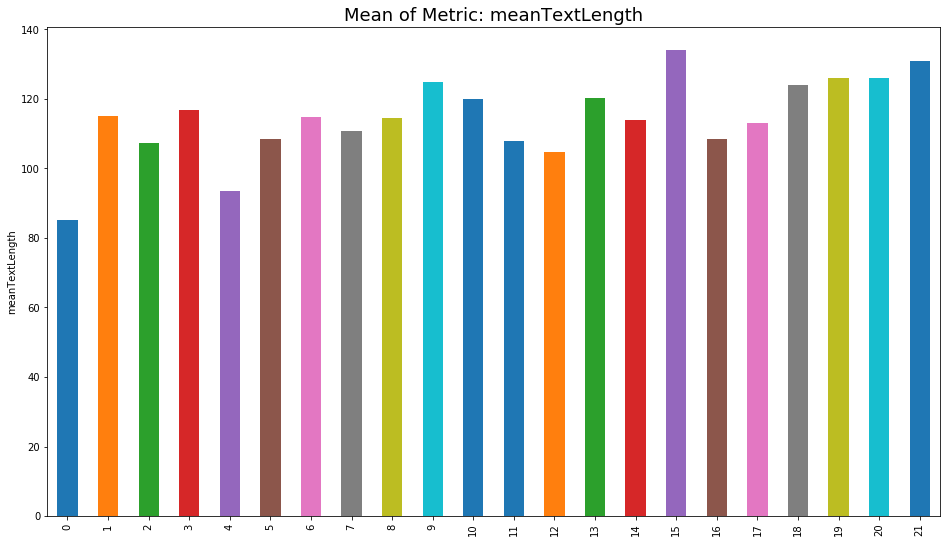

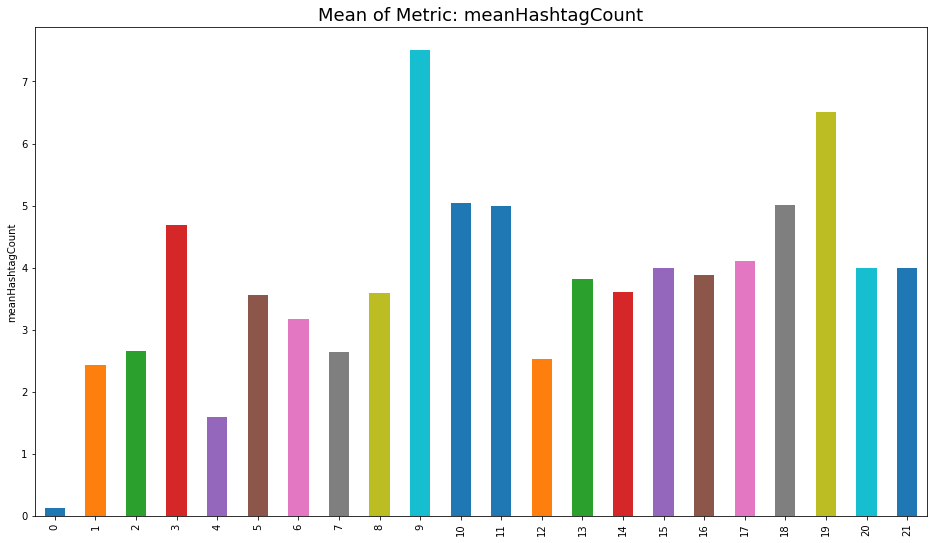

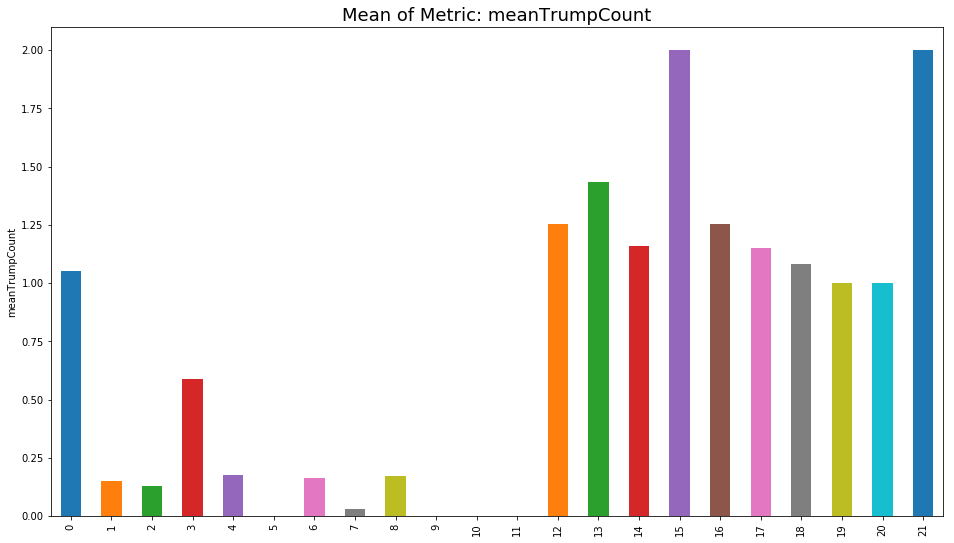

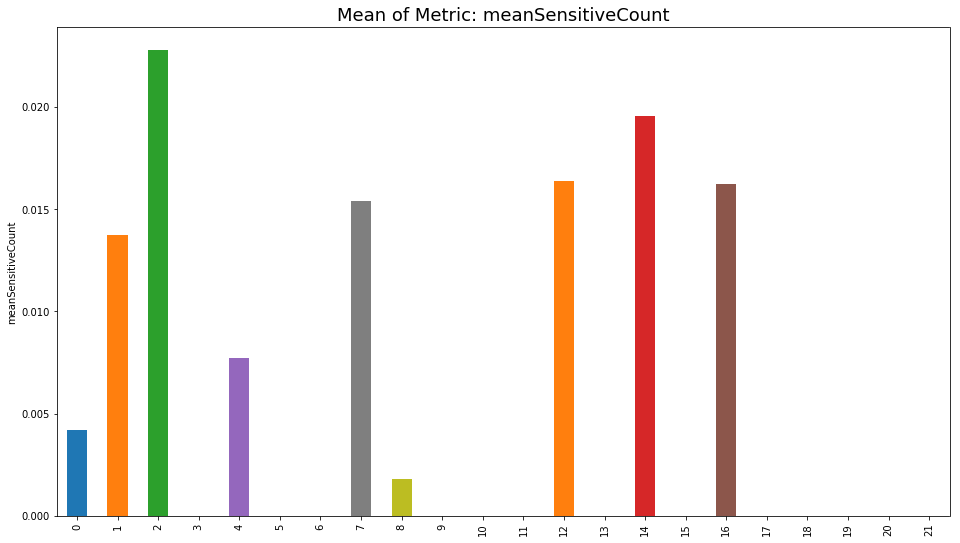

In [13]:
plotMetric(meanMetrics, 'count')
plotMetric(meanMetrics, 'meanTextLength')
plotMetric(meanMetrics, 'meanHashtagCount')
plotMetric(meanMetrics, 'meanTrumpCount')
plotMetric(meanMetrics, 'meanSensitiveCount')

Text(0.5,1,'Timeseries of Counts')

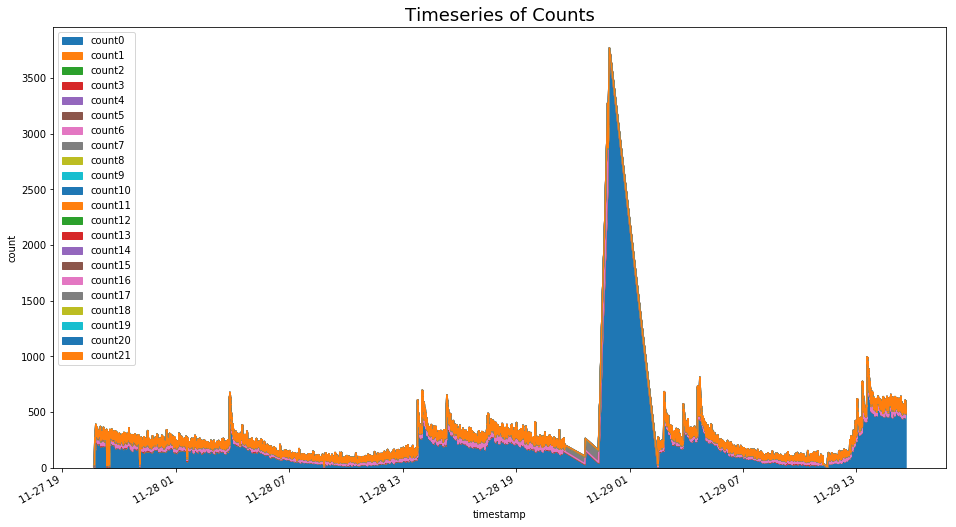

In [14]:
countMetrics = pd.DataFrame()
for i in range(0,len(comboTimeseriesList)):
    countMetrics['count'+str(i)] = comboTimeseriesList[i]['count']
    
countMetrics['timestamp'] = comboTimeseriesList[0]['timestamp']

fig = plt.figure(figsize=(16,9))
ax = plt.axes()
countMetrics.plot(x='timestamp',kind='area',ax=ax)
plt.ylabel('count')
plt.title('Timeseries of Counts', fontsize=18)

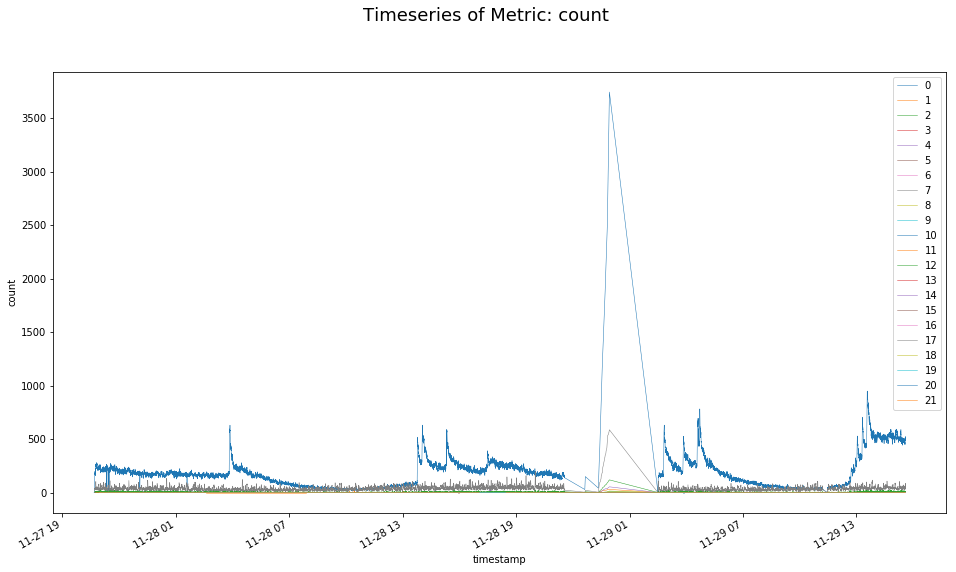

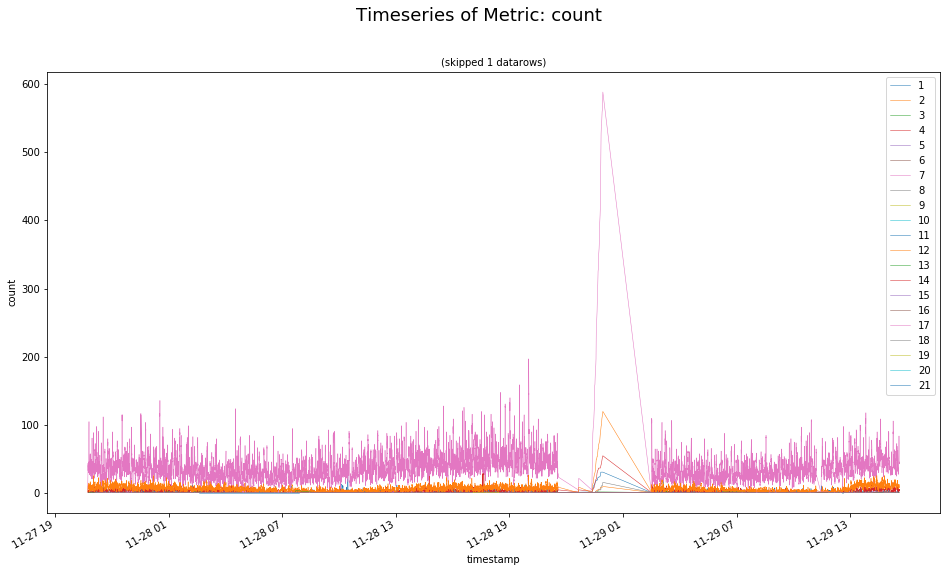

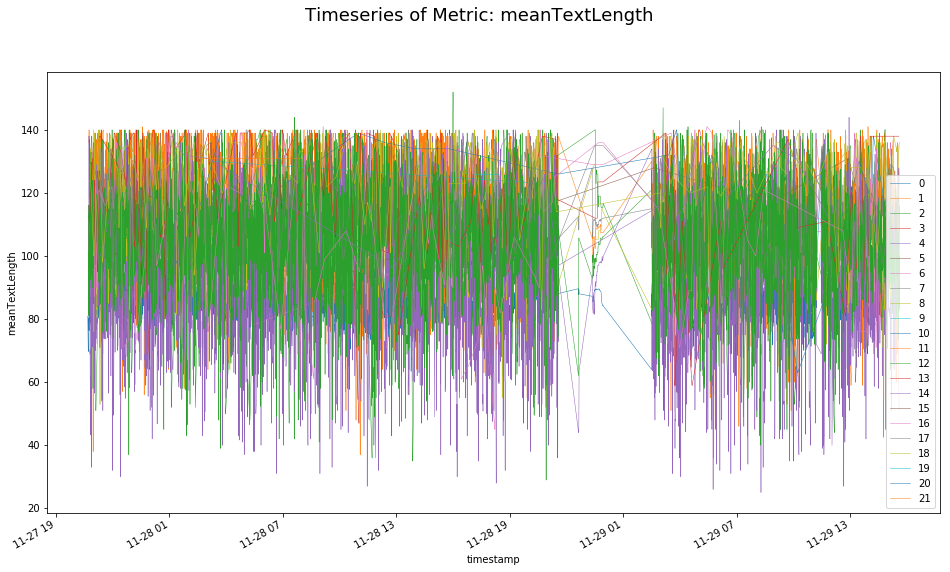

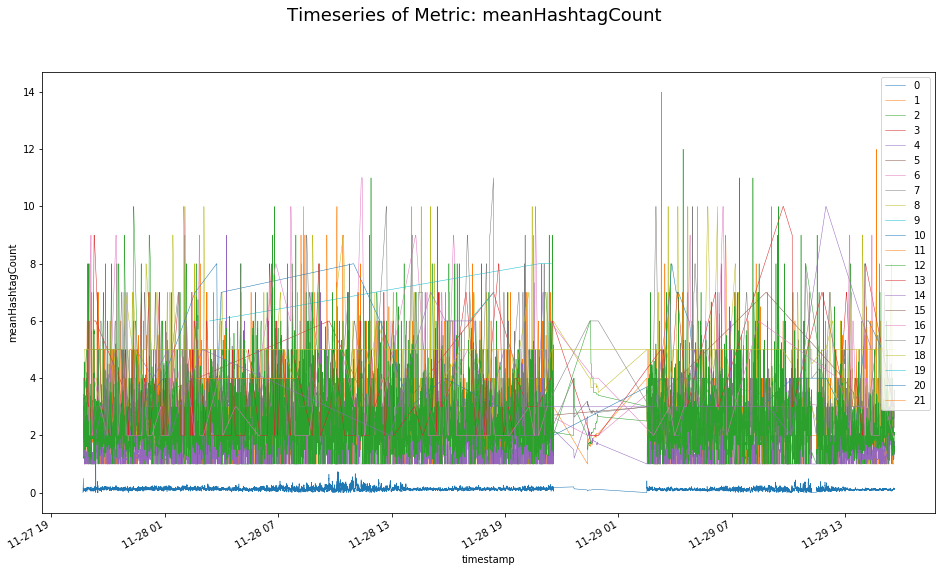

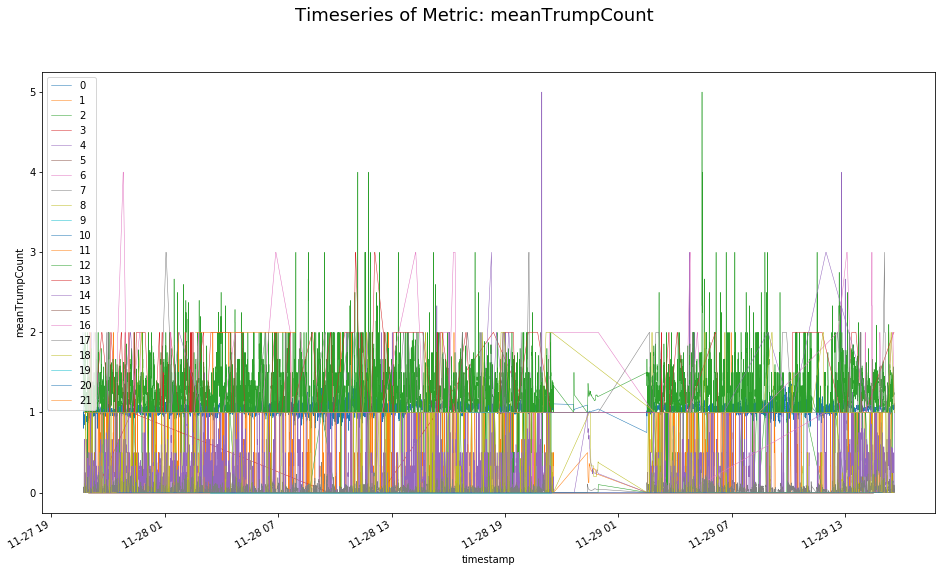

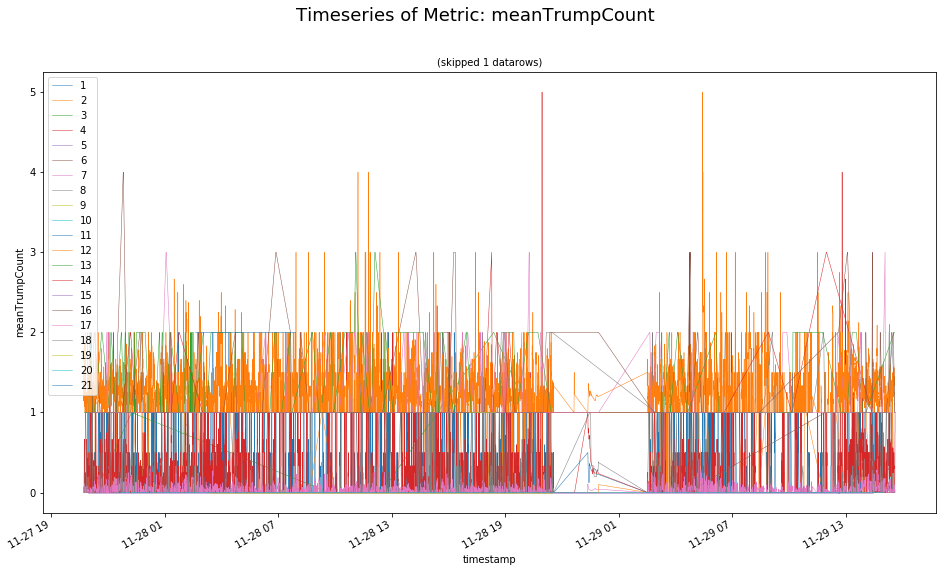

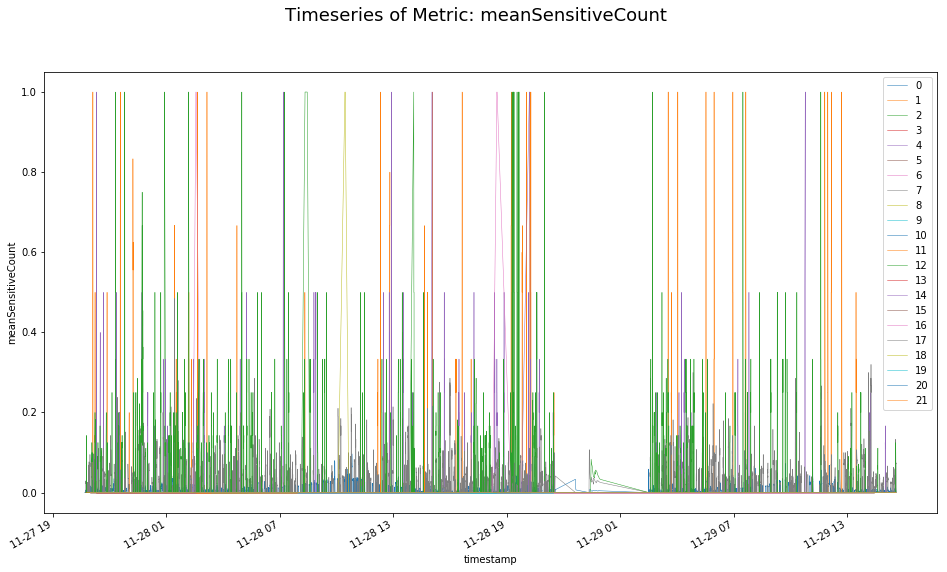

In [15]:
plotMetricTimeseries(comboTimeseriesList, 'count')
plotMetricTimeseries(comboTimeseriesList, 'count', skip = 1)
plotMetricTimeseries(comboTimeseriesList, 'meanTextLength')
plotMetricTimeseries(comboTimeseriesList, 'meanHashtagCount')
plotMetricTimeseries(comboTimeseriesList, 'meanTrumpCount')
plotMetricTimeseries(comboTimeseriesList, 'meanTrumpCount', skip = 1)
plotMetricTimeseries(comboTimeseriesList, 'meanSensitiveCount')